<a href="https://colab.research.google.com/github/Ronit82/Data-prediction-model/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [ ]:
path ='/content/drive/MyDrive/DATATHON/Supplementary Content/3. Workshop Content/Datasets/'



In [ ]:
read_bank = pd.read_csv(path+"Bank/bank-full.csv", delimiter =";")
read_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
read_train = pd.read_csv(path+"Halloween/train.csv")
read_train.head()
read_train.isnull().sum()
read_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [ ]:
read_train.describe(include="all")

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6368,6363.000000,6368,6368.000000,6157,6368,6368,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
unique,6368,NaN,5350,NaN,5900,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WATD9H76PTHAUCHY,NaN,2015-09-22 15:24:59.000,NaN,Tennessee,Yes,Pet_care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,6,NaN,2,3887,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.309445,NaN,199.340609,NaN,NaN,NaN,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,NaN,14.328980,NaN,170.275570,NaN,NaN,NaN,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,NaN,13.000000,NaN,55.000000,NaN,NaN,NaN,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,NaN,25.000000,NaN,132.000000,NaN,NaN,NaN,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,NaN,37.000000,NaN,403.000000,NaN,NaN,NaN,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252


In [ ]:
read_train[read_train['Selling_Price'] <0]
read_train=read_train[read_train['Selling_Price'] >0]
read_train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [ ]:
def check_missing_data(read_train):
    flag=read_train.isna().sum().any()
    if flag==True:
        total = read_train.isnull().sum()
        percent = round((read_train.isnull().sum())/(read_train.isnull().count()),3)*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in read_train.columns:
            dtype = str(read_train[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
    
check_missing_data(read_train)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Total,0,5,0,0,206,0,0,0,0,37,197,204,38,340,0
Percent,0,0.1,0,0,3.3,0,0,0,0,0.6,3.1,3.2,0.6,5.4,0
Types,object,float64,object,int64,object,object,object,int64,int64,float64,float64,float64,float64,float64,float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe54159dad0>]],
      dtype=object)

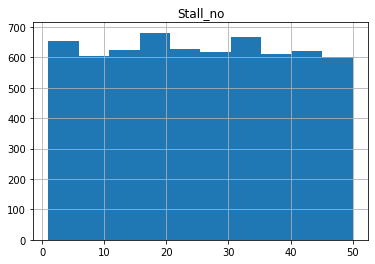

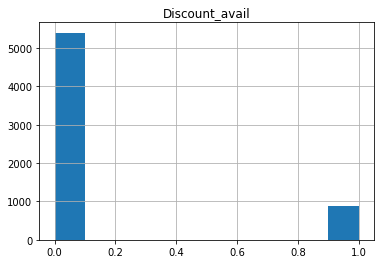

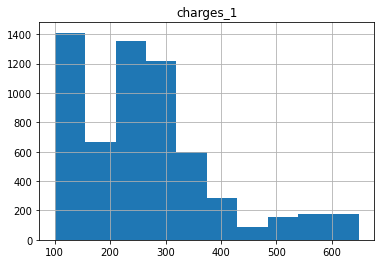

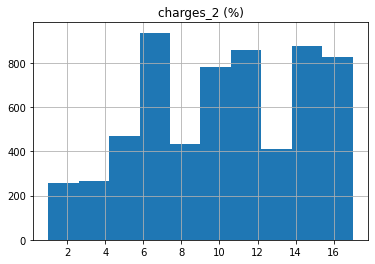

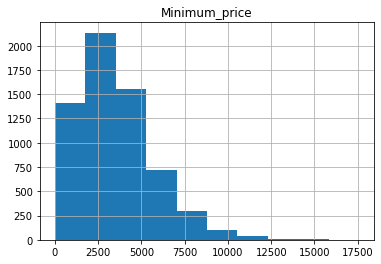

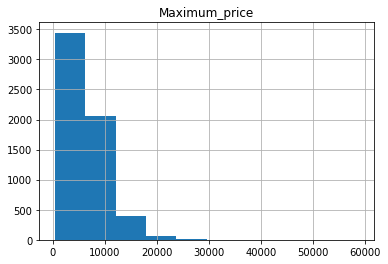

In [ ]:
read_train.hist('Stall_no')
read_train.hist('Discount_avail')
read_train.hist('charges_1')
read_train.hist('charges_2 (%)')
read_train.hist('Minimum_price')
read_train.hist('Maximum_price')

In [ ]:
#Imputing the numerical variables:

read_train['Stall_no'] = read_train['Stall_no'].fillna(read_train.Stall_no.mean()) # because the hist is normally distribted

#!#df['Discount_avail'] = df['Discount_avail'].fillna(df.Discount_avail.median()) # You cannot use mean/median because it's a ctegorical variable

read_train['charges_1'] = read_train['charges_1'].fillna(read_train.charges_1.median()) # because the hist is skewed

read_train['charges_2 (%)'] = read_train['charges_2 (%)'].fillna(read_train['charges_2 (%)'].median()) # because the hist is skewed

read_train['Minimum_price'] = read_train['Minimum_price'].fillna(read_train.Minimum_price.median()) # because the hist is skewed

read_train['Maximum_price'] = read_train['Maximum_price'].fillna(read_train.Maximum_price.median()) # because the hist is skewed

In [ ]:
check_missing_data(read_train)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Total,0,0,0,0,206,0,0,0,0,37,0,0,0,0,0
Percent,0,0,0,0,3.3,0,0,0,0,0.6,0,0,0,0,0
Types,object,float64,object,int64,object,object,object,int64,int64,float64,float64,float64,float64,float64,float64


In [ ]:
read_train['Customer_name'] = read_train['Customer_name'].fillna(read_train.Customer_name.mode()[0])
read_train['Discount_avail'] = read_train['Discount_avail'].fillna(read_train.Discount_avail.mode()[0])

In [ ]:
check_missing_data(read_train)

False

In [ ]:
#Bank

In [ ]:
df = pd.read_csv(path+"Bank/bank-full.csv", delimiter =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


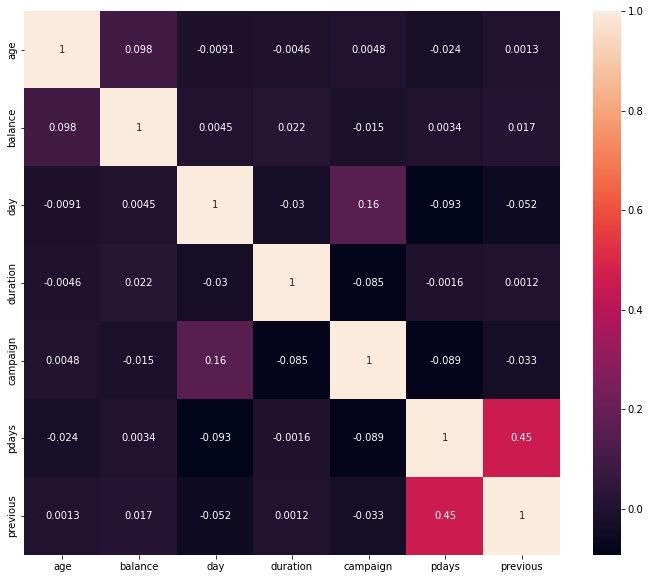

In [ ]:
plt.figure(figsize=(12, 10)) # Set the figure size
sns.heatmap(df.corr(), annot=True) # Print the heatmap

In [ ]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']].nunique(axis=0)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [ ]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
  print(f'{i} - {df[i].unique()}', end='\n\n')

job - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital - ['married' 'single' 'divorced']

education - ['tertiary' 'secondary' 'unknown' 'primary']

default - ['no' 'yes']

housing - ['yes' 'no']

loan - ['no' 'yes']

contact - ['unknown' 'cellular' 'telephone']

month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome - ['unknown' 'failure' 'other' 'success']

y - ['no' 'yes']



In [ ]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()


labelenc = LabelEncoder()
data['default'] = labelenc.fit_transform(data['default'])

data.iloc[:10,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,0,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,0,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,1,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,0,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,0,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalenc = OrdinalEncoder()
data['education'] = labelenc.fit_transform(data['education'])
data.iloc[:10,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,3,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,3,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,2,0,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,2,0,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,2,1,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,0,0,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,1,0,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalenc = OrdinalEncoder()
data['marital'] = labelenc.fit_transform(data['marital'])
data.iloc[:10,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,2,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,3,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,2,3,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,1,2,0,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,2,2,0,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,0,2,1,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,1,0,0,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,2,1,0,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
def encodeCols(data):
  for i, row in data.iterrows():
    if row['marital'] == 'married':
      data.at[i, 'marital'] = 1
    elif data.at[i, 'marital'] == 'single':
      data.at[i, 'marital'] = 0
    elif data.at[i, 'marital'] == 'divorced':
      data.at[i, 'marital'] = -1

    if data.at[i, 'education'] == 'unknown':
      data.at[i, 'education'] = 0
    elif data.at[i, 'education'] == 'primary':
      data.at[i, 'education'] = 1
    elif data.at[i, 'education'] == 'secondary':
      data.at[i, 'education'] = 2
    else:
      data.at[i, 'education'] = 3

    if data.at[i, 'default'] == 'yes':
      data.at[i, 'default'] = 1
    else:
      data.at[i, 'default'] = 0
    
    if data.at[i, 'housing'] == 'yes':
      data.at[i, 'housing'] = 1
    else:
      data.at[i, 'housing'] = 0

    if data.at[i, 'loan'] == 'yes':
      data.at[i, 'loan'] = 1
    else:
      data.at[i, 'loan'] = 0

    if data.at[i, 'contact'] == 'cellular':
      data.at[i, 'contact'] = 1
    elif data.at[i, 'contact'] == 'telephone':
      data.at[i, 'contact'] = -1
    else:
      data.at[i, 'contact'] = 0

    if data.at[i, 'y'] == 'yes':
      data.at[i, 'y'] = 1
    else:
      data.at[i, 'y'] = 0

encodeCols(df)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,3,0,2143,1,0,0,5,may,261,1,-1,0,unknown,0
1,44,technician,0,2,0,29,1,0,0,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,2,0,2,1,1,0,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,0,0,1506,1,0,0,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,0,0,1,0,0,0,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,3,0,825,0,0,1,17,nov,977,3,-1,0,unknown,1
45207,71,retired,-1,1,0,1729,0,0,1,17,nov,456,2,-1,0,unknown,1
45208,72,retired,1,2,0,5715,0,0,1,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,2,0,668,0,0,-1,17,nov,508,4,-1,0,unknown,0


In [ ]:
def makeCountPlot(data, width=0, height=4, hue=None):
  if width == 0:
    width = len(data.unique())*1.25
  plt.figure(figsize=(width, height))
  sns.countplot(x=data, hue=hue)

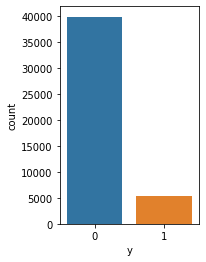

In [ ]:
makeCountPlot(data=df['y'])

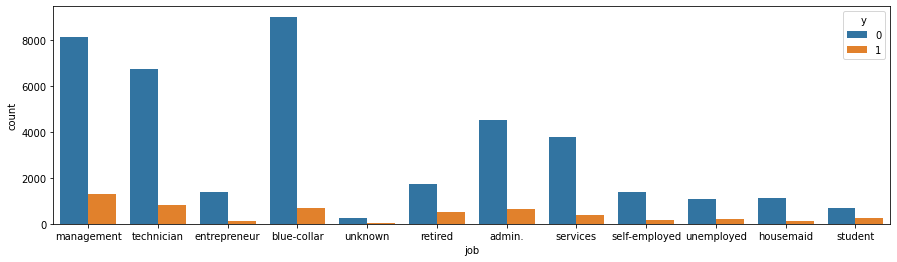

In [ ]:
makeCountPlot(data=df['job'], hue=df['y'])

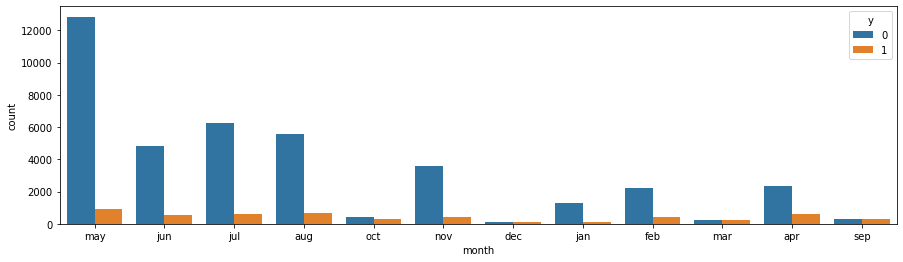

In [ ]:
makeCountPlot(data=df['month'], hue=df['y'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,3,0,2143,1,0,0,5,may,261,1,-1,0,unknown,0
1,44,technician,0,2,0,29,1,0,0,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,2,0,2,1,1,0,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,0,0,1506,1,0,0,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,0,0,1,0,0,0,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,3,0,825,0,0,1,17,nov,977,3,-1,0,unknown,1
45207,71,retired,-1,1,0,1729,0,0,1,17,nov,456,2,-1,0,unknown,1
45208,72,retired,1,2,0,5715,0,0,1,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,2,0,668,0,0,-1,17,nov,508,4,-1,0,unknown,0


In [ ]:
#vanhot encoding 
df = pd.get_dummies(df, columns=['month', 'job', 'poutcome'])
df

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,3,0,2143,1,0,0,5,261,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,44,0,2,0,29,1,0,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,1,2,0,2,1,1,0,5,76,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,92,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,33,0,0,0,1,0,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,3,0,825,0,0,1,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,-1,1,0,1729,0,0,1,17,456,2,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
45208,72,1,2,0,5715,0,0,1,17,1127,5,184,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
45209,57,1,2,0,668,0,0,-1,17,508,4,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


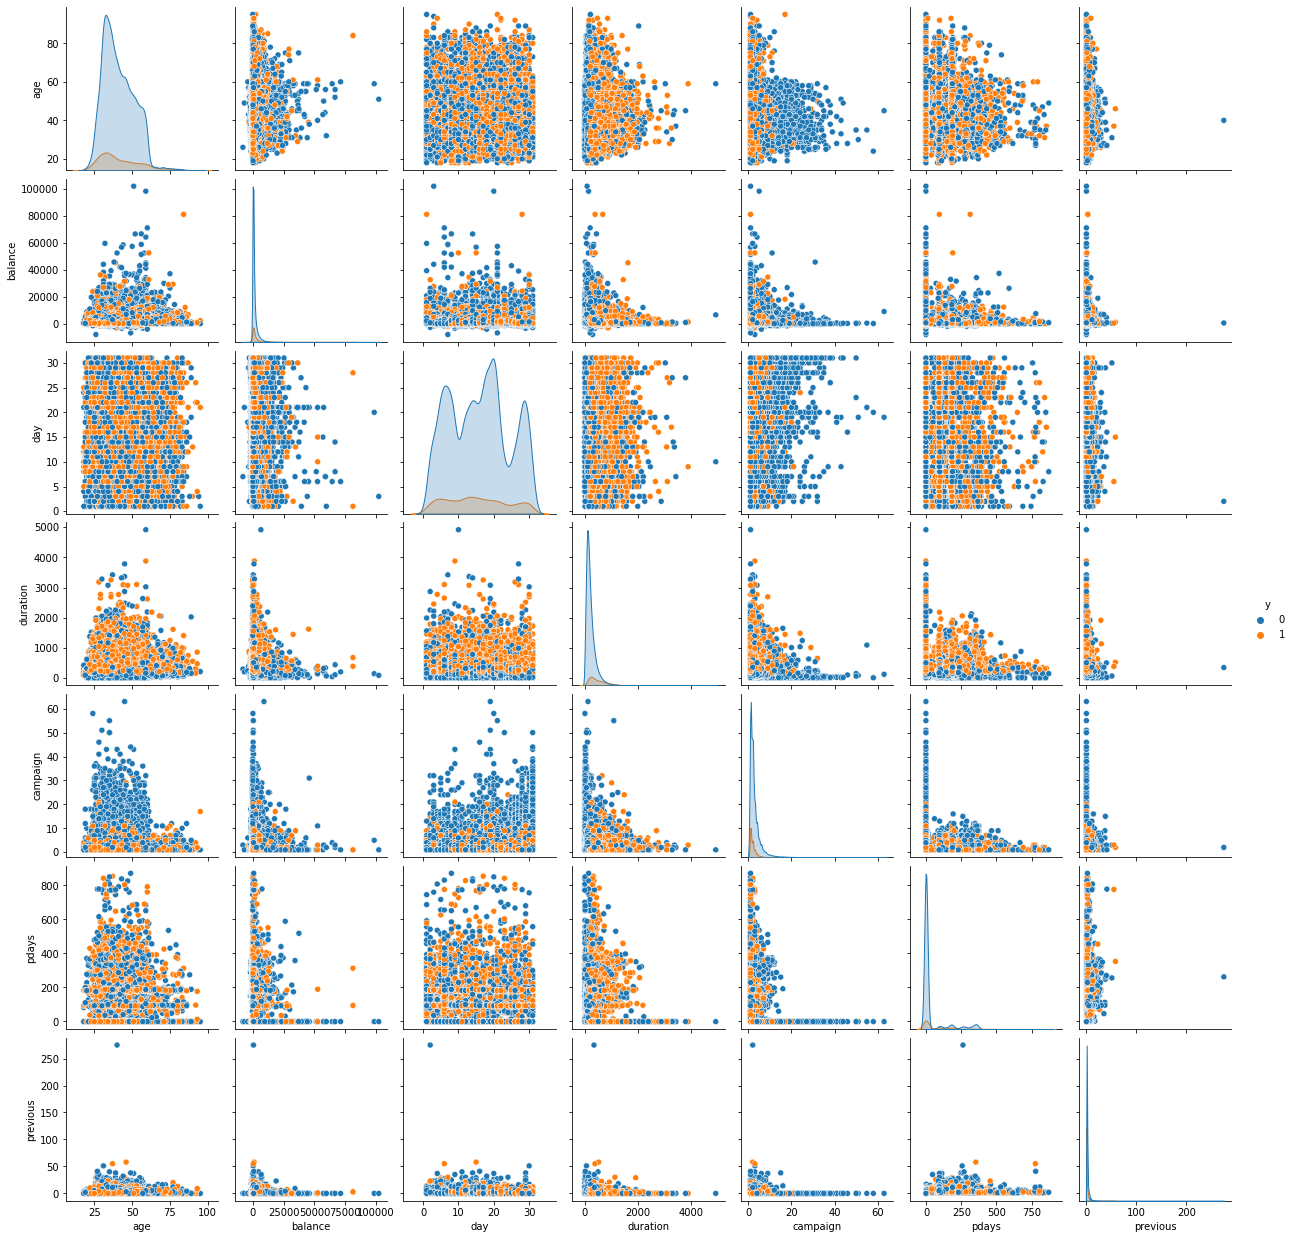

In [ ]:
sns.pairplot(df[['age', 'balance',    'day', 'duration', 'campaign', 'pdays',    'previous', 'y']], hue='y')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
x = df.drop(columns=['y'])
y = np.array(df['y'], dtype='float32')

In [ ]:
mms = MinMaxScaler() # Creating an instance of this class
ss = StandardScaler()
x = ss.fit_transform(x)
x = mms.fit_transform(x)
x = pd.DataFrame(x, columns=df.drop(columns=['y']).columns)
x


,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,1.0,1.000000,0.0,0.092259,1.0,0.0,0.5,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.5,0.666667,0.0,0.073067,1.0,0.0,0.5,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,1.0,0.666667,0.0,0.072822,1.0,1.0,0.5,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,1.0,0.000000,0.0,0.086476,1.0,0.0,0.5,0.133333,0.018707,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.5,0.000000,0.0,0.072812,0.0,0.0,0.5,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,1.0,1.000000,0.0,0.080293,0.0,0.0,1.0,0.533333,0.198658,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.0,0.333333,0.0,0.088501,0.0,0.0,1.0,0.533333,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,1.0,0.666667,0.0,0.124689,0.0,0.0,1.0,0.533333,0.229158,0.064516,0.212156,0.010909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,1.0,0.666667,0.0,0.078868,0.0,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


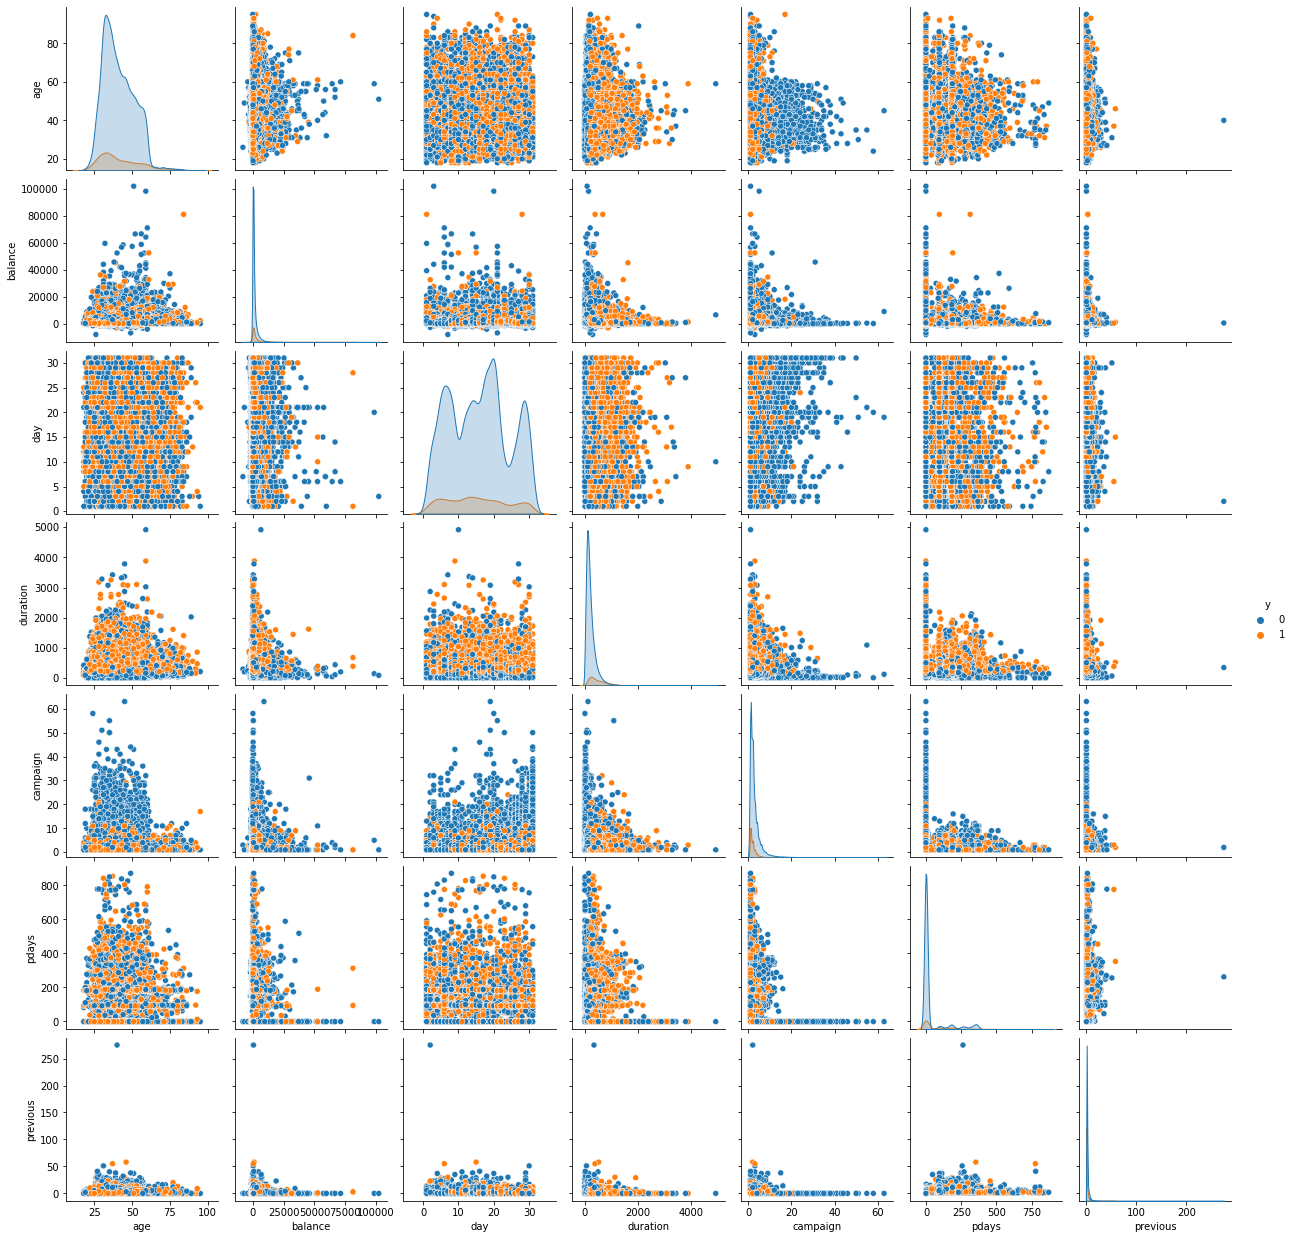

In [ ]:
sns.pairplot(df[['age', 'balance',    'day', 'duration', 'campaign', 'pdays',    'previous', 'y']], hue='y')

In [ ]:
x_tr, x_test, y_tr, y_test = train_test_split(x, y, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, stratify=y_tr)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

# model = GaussianNB()
model = DecisionTreeClassifier()

model.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = model.predict(x_val)

In [ ]:
print(classification_report(pred, y_val))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      7450
         1.0       0.50      0.48      0.49      1027

    accuracy                           0.88      8477
   macro avg       0.71      0.71      0.71      8477
weighted avg       0.88      0.88      0.88      8477



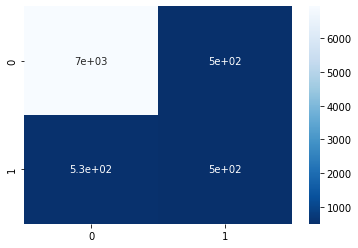

In [ ]:
sns.heatmap(confusion_matrix(pred, y_val), annot=True, cmap='Blues_r')

In [ ]:
#neural network code 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                1722      
_________________________________________________________________
dense_1 (Dense)              (None, 82)                3444      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 83        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
795/795 [==============================] - 2s 2ms/step - loss: 0.2999 - accuracy: 0.8895
Epoch 2/10
795/795 [==============================] - 2s 2ms/step - loss: 0.2377 - accuracy: 0.9017
Epoch 3/10
795/795 [==============================] - 2s 2ms/step - loss: 0.2243 - accuracy: 0.9048
Epoch 4/10
795/795 [==============================] - 1s 2ms/step - loss: 0.2199 - a

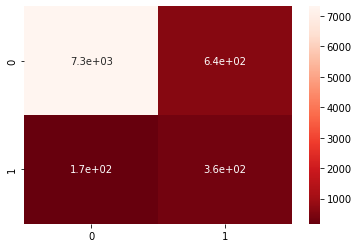

In [ ]:
import tensorflow as tf
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(x_train.shape[1], input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(x_train.shape[1]*2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.summary()
nn.fit(x=x_train, y=y_train, epochs=10)
nnpred = nn.predict(x_val)
nnpred
pred = []
for i in nnpred:
  if i < 0.5:
    pred.append(np.float32(0))
  else:
    pred.append(np.float32(1))
print(classification_report(pred, y_val))
sns.heatmap(confusion_matrix(pred, y_val), annot=True, cmap='Reds_r')